In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Datasets/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Preprocessing the Dataset

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis

<Axes: >

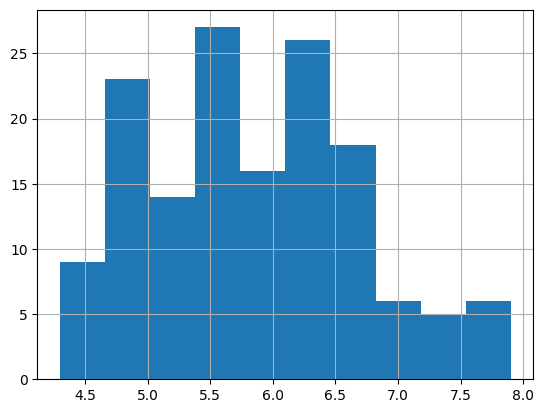

In [11]:
df['sepal_length'].hist()

<Axes: >

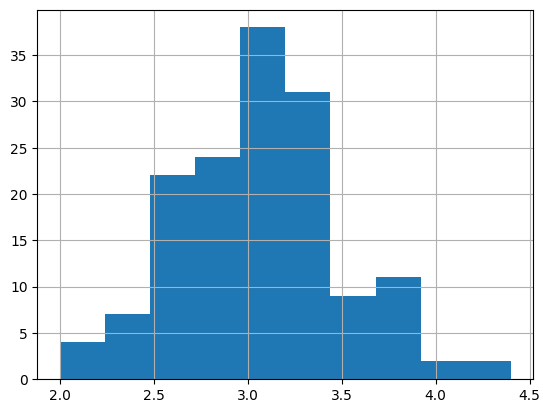

In [12]:
df['sepal_width'].hist()

<Axes: >

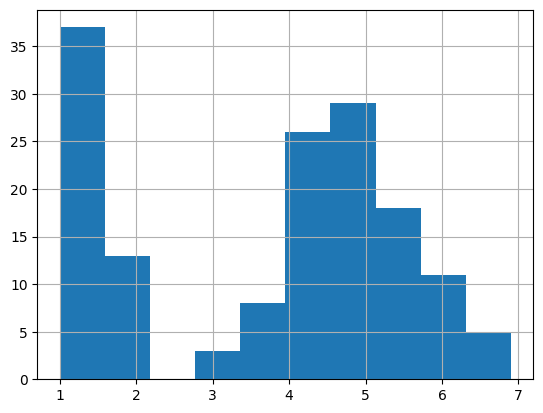

In [13]:
df['petal_length'].hist()

<Axes: >

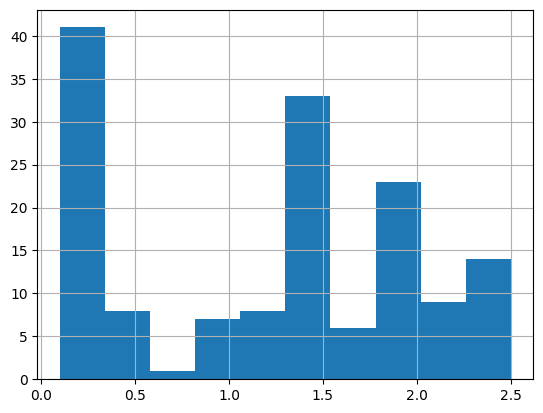

In [14]:
df['petal_width'].hist()

In [16]:
#scatterplot
colors = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

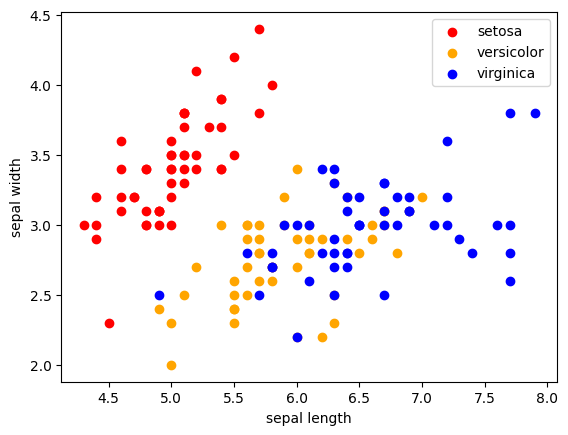

In [19]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

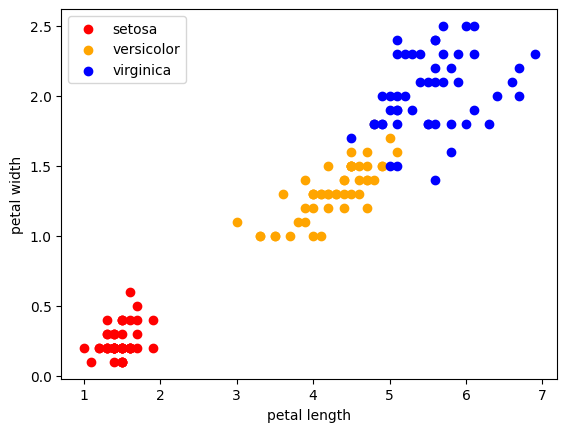

In [20]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

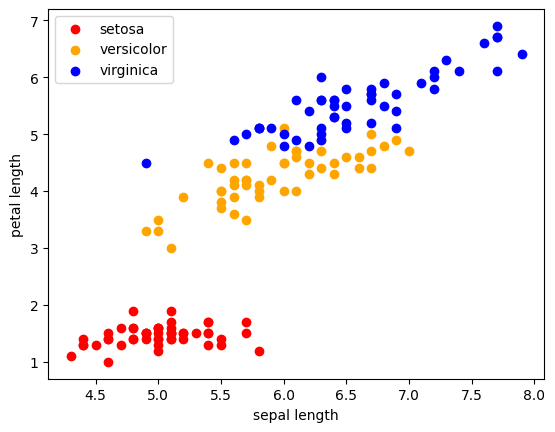

In [21]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

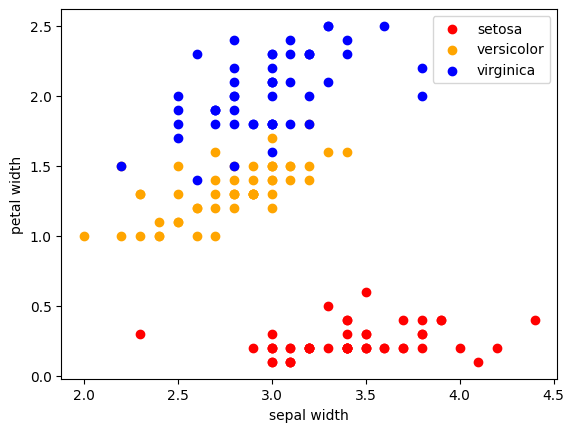

In [22]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

## Corelation Matrix

In [27]:
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [93]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [94]:
# LogReg
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [95]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [96]:
# performance metric
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [97]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [98]:
model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [99]:
# performance metric
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  90.0


In [100]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [101]:
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [102]:
# performance metric
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667
